# Movies

EXISTING

This data frame lists all movies, their year, IMBD rating, IMBD votes, and their genres. The `movie_ID` column is later referenced in other data frames.

In [1]:
# import packages
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# turn off pretty printing
%pprint

Pretty printing has been turned OFF


## Loading in the data and basic summary

In [3]:
movies_df = pd.read_csv('./data/movie_titles_metadata.txt', sep='\s+\+\+\+\$\+\+\+\s?',
                        names=['movie_ID', 'movie_title' , 'movie_year', 'IMDB_rating', 'IMBD_votes', 'genres'], 
                        engine='python', encoding='ISO-8859-1')

The data was all separated with ' +++$+++ ' and did not have column names. The README described what each column was in the data so I used that to create column names.

In [4]:
movies_df.shape

(617, 5)

In [5]:
# no missing values here
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, m0 to m616
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_title  617 non-null    object 
 1   movie_year   617 non-null    object 
 2   IMDB_rating  617 non-null    float64
 3   IMBD_votes   617 non-null    int64  
 4   genres       617 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 28.9+ KB


In [6]:
movies_df.head()

,movie_title,movie_year,IMDB_rating,IMBD_votes,genres
movie_ID,,,,,
m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"
m1,1492: conquest of paradise,1992,6.2,10421,"['adventure', 'biography', 'drama', 'history']"
m2,15 minutes,2001,6.1,25854,"['action', 'crime', 'drama', 'thriller']"
m3,2001: a space odyssey,1968,8.4,163227,"['adventure', 'mystery', 'sci-fi']"
m4,48 hrs.,1982,6.9,22289,"['action', 'comedy', 'crime', 'drama', 'thrill..."


In [7]:
# I do not need the IMDB information
movies_df = movies_df[['movie_title', 'movie_year', 'genres']]

In [8]:
# what is the earliest movie in the df?
movies_df['movie_year'].min()

'1927'

In [9]:
# what is the most recent movie in the df?
movies_df['movie_year'].max()

'2010'

In [10]:
# how many movies per year?
movies_df.groupby('movie_year').count()

,movie_title,genres
movie_year,,
1927,2,2
1931,2,2
1932,4,4
1933,2,2
1934,3,3
...,...,...
2007/I,1,1
2008,1,1
2009,3,3


## Cleaning the data

Too many years to display all at once, I will add decade information for easier analysis. Some of this data will need to be cleaned up as well, extra '/I' after some of the movie years for some reason.

In [11]:
# removing extra characters after the year
movies_df['movie_year'] = movies_df['movie_year'].str.rstrip(r'/I')

In [12]:
# convert the movie_year to integer to generate decade
movies_df = movies_df.astype({'movie_year':'int'})

In [13]:
movies_df.groupby('movie_year').count()

,movie_title,genres
movie_year,,
1927,2,2
1931,2,2
1932,4,4
1933,2,2
1934,3,3
...,...,...
2006,6,6
2007,5,5
2008,1,1


In [14]:
# add decades for easier grouping
movies_df['movie_decade'] = 10 * (movies_df['movie_year'] // 10)

In [15]:
# how many movies per decade?
movies_df.groupby('movie_decade').count()

,movie_title,movie_year,genres
movie_decade,,,
1920,2,2,2
1930,16,16,16
1940,15,15,15
1950,17,17,17
1960,19,19,19
1970,51,51,51
1980,108,108,108
1990,244,244,244
2000,144,144,144


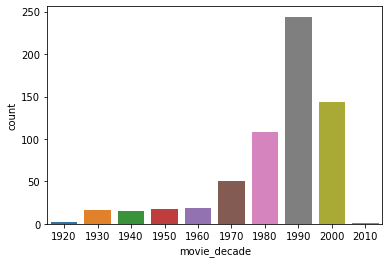

In [16]:
sns.countplot(x = "movie_decade",
             data = movies_df)
plt.show()

Wide span of movies, from the 1920s to the 2010s, but most of them come from the 1980s to the 2000s.

## Pickling the data and creating a csv

In [17]:
import pickle

In [18]:
# pickle the data to use in other notebooks for further analysis
f = open('movies_df.pkl', 'wb')
pickle.dump(movies_df, f, -1)
f.close()

In [20]:
movies_df.to_csv('./new_data/movies_df.csv', header=True)